# Principal Component Analysis of Spotify artists

Let's run it on the huge 2500 x 2500 matrix and map each artist to a 2d point!

In [25]:
import json
from utils import name2id, id2name, artist_data, top_artists
import numpy as np
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from matplotlib import pyplot as plt

In [33]:
artist_names = [id2name[_id] for _id in top_artists]

In [6]:
with open("./data/2.5k_matrix.json") as fin:
    big_matrix = json.load(fin)

In [11]:
N = 2500
corr_matrix = np.zeros((N, N), dtype=int)

for i in tqdm(range(N)):
    scores = big_matrix[top_artists[i]]

    for j in range(N):
        other_id = top_artists[j]
        if not other_id in scores: continue
        corr_matrix[i, j] = scores[other_id]

100%|██████████| 2500/2500 [00:09<00:00, 267.20it/s]


## Scale features so that mean=0, std=1 for columns and rows

In [19]:
def scale_columns(mat):
    return StandardScaler().fit_transform(mat)

def scale_rows(mat):
    return StandardScaler().fit_transform(mat.T).T

corr_matrix_scaled = scale_columns(scale_rows(corr_matrix))

In [27]:
PCA_2d = PCA(n_components=2)
artist_2d = PCA_2d.fit_transform(corr_matrix_scaled)

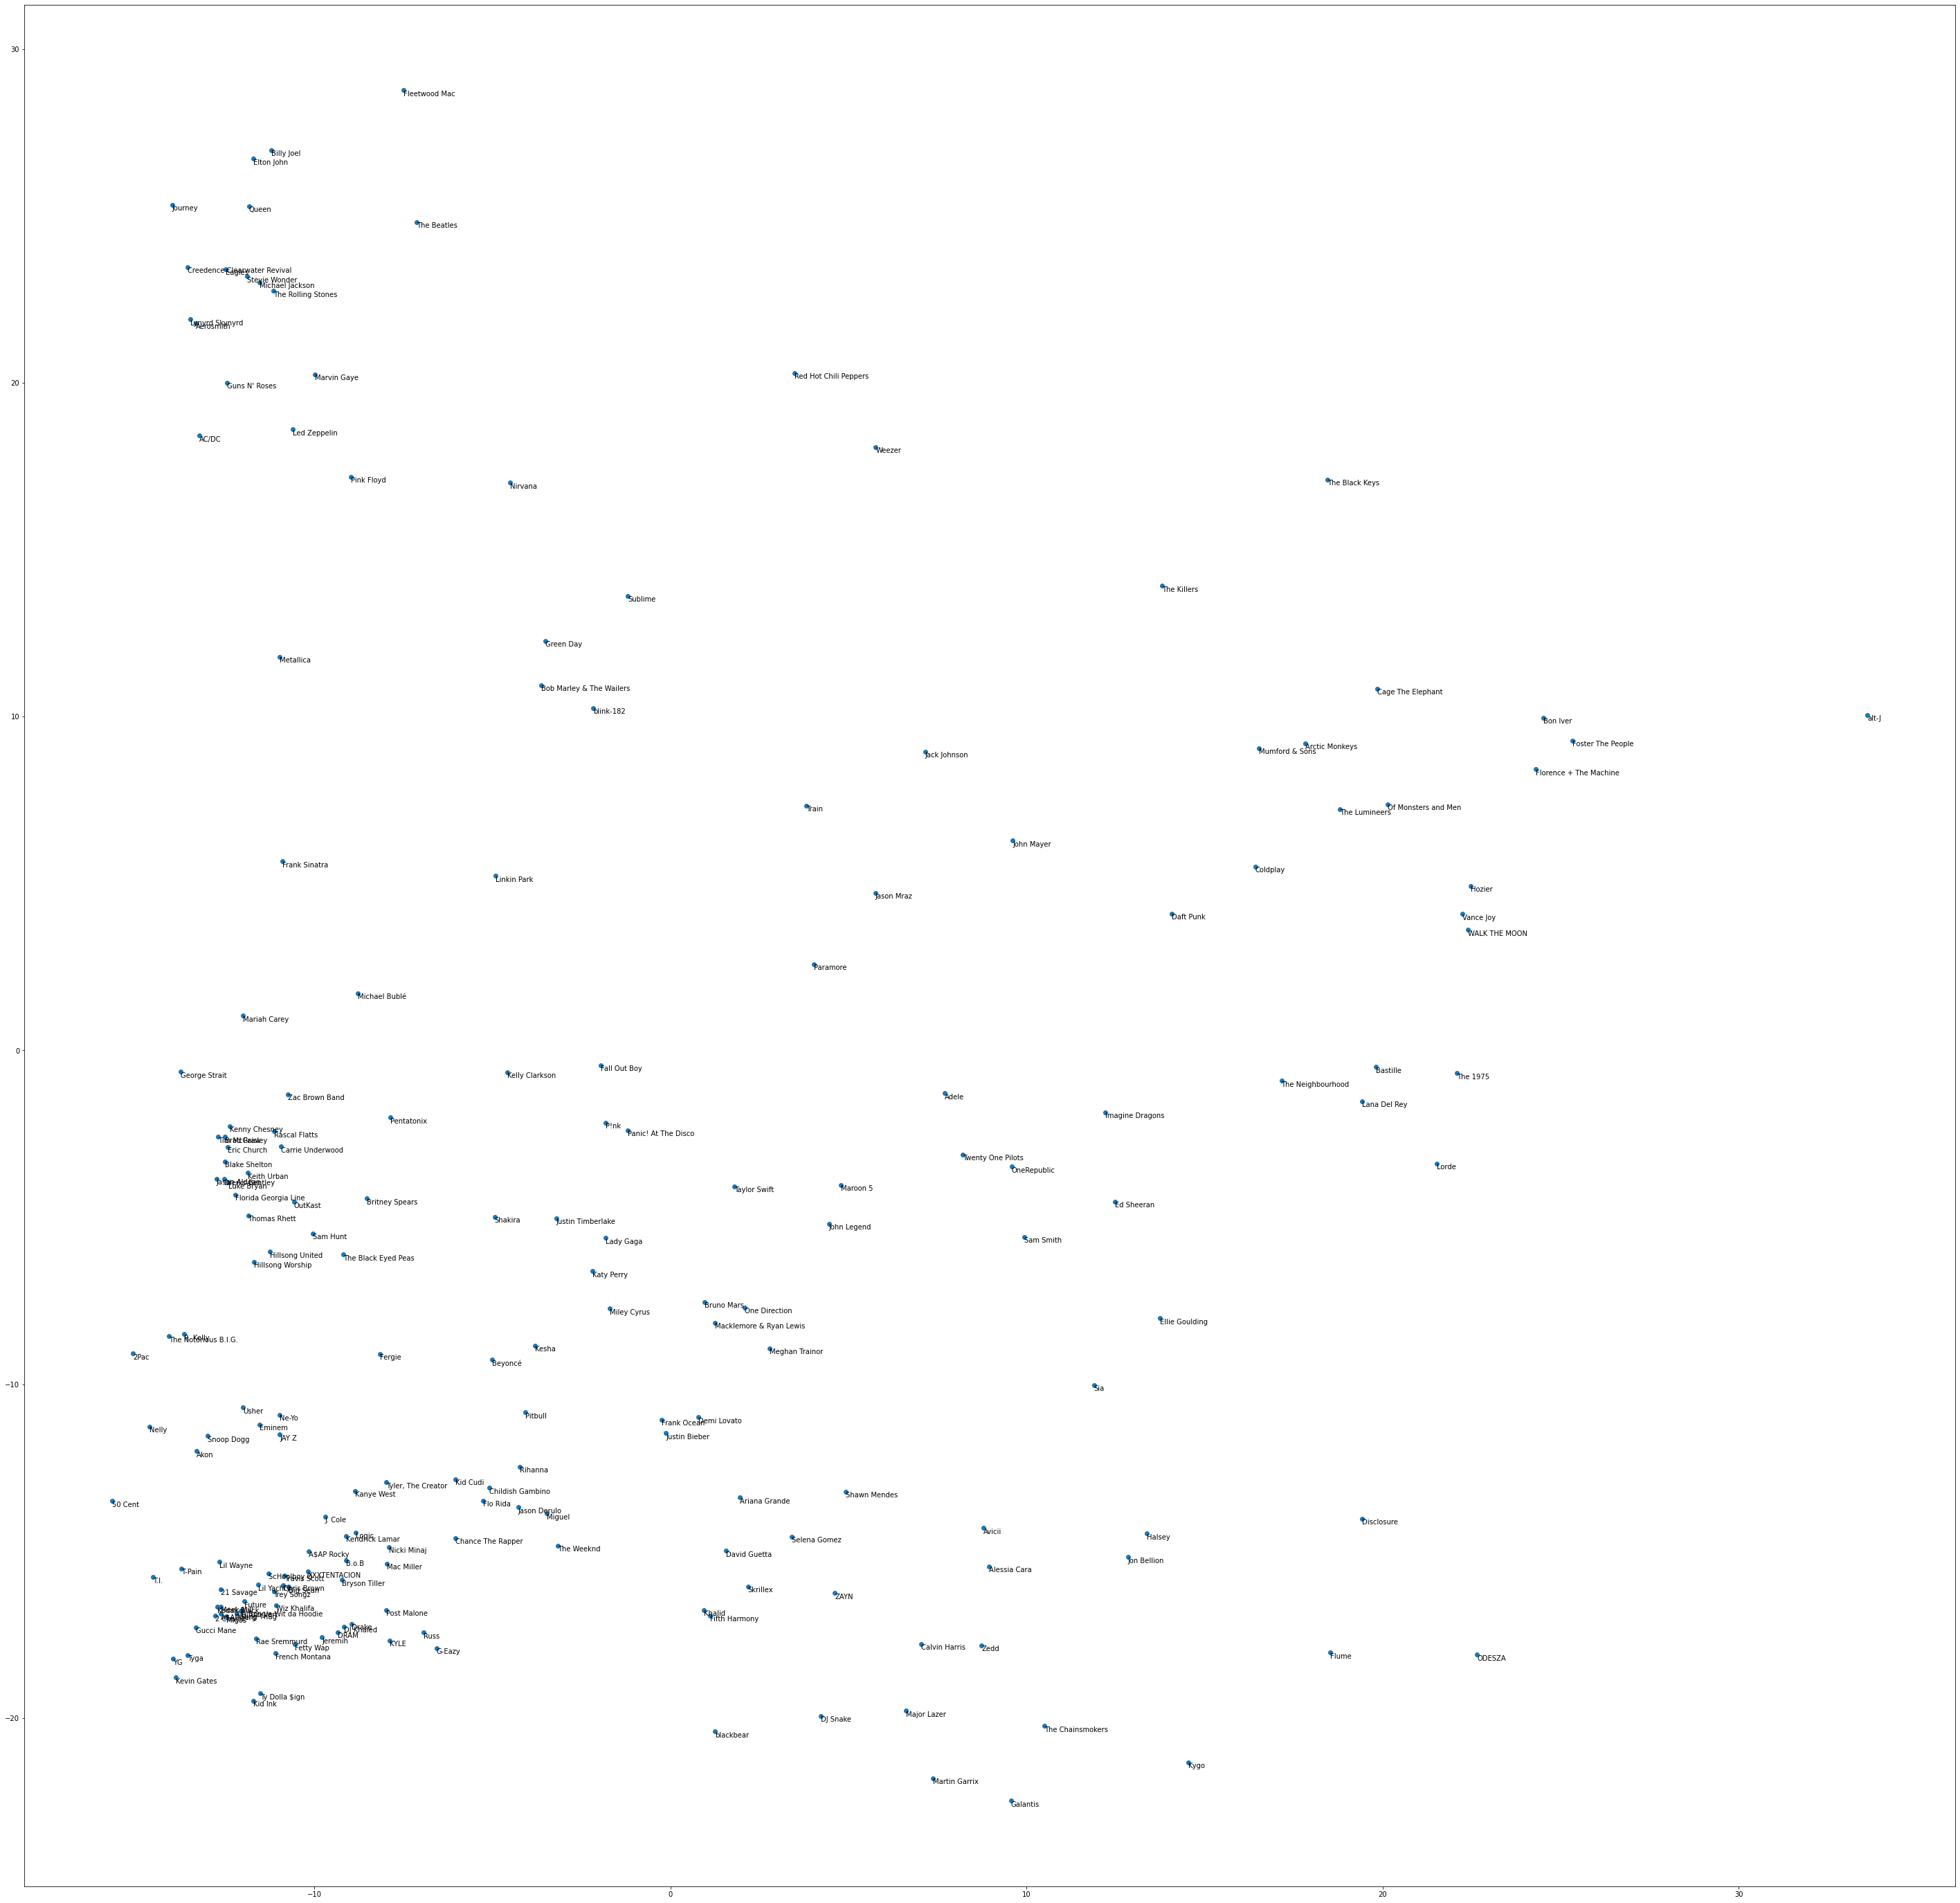

In [44]:
# 10 in 2 s
from adjustText import adjust_text

fig = plt.figure(figsize=(50, 50))

n_plot = 200

plot_2d = fig.add_subplot()
plot_2d.scatter(*artist_2d[:n_plot].T)

labels = []
for name, coords in zip(artist_names[:n_plot], artist_2d[:n_plot]):
    labels.append(plt.text(coords[0], coords[1], name, ha="left", va="top"))